<a href="https://colab.research.google.com/github/Janhvi-Pandya/selenium-qa-automation/blob/main/end_to_end_test_of_an_e_commerce_platform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!apt-get update
!apt-get install -y chromium-chromedriver
!pip install selenium


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

# 🛠️ Selenium Web Automation: SauceDemo Login Test  
This script automates the login process for **SauceDemo** using **Selenium WebDriver**.  
It:
- Launches a **Chrome browser** in headless mode  
- Navigates to **SauceDemo's login page**  
- **Enters credentials** and logs in  
- **Verifies login success** by checking the URL  
- **Captures a screenshot** for validation  
- **Closes the browser** after execution  


In [23]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# Configure Chrome options
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run in headless mode
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

# Start WebDriver
driver = webdriver.Chrome(options=options)

# Open SauceDemo login page
driver.get("https://www.saucedemo.com/")
time.sleep(3)

try:
    # Locate username and password fields
    username_field = driver.find_element(By.ID, "user-name")
    password_field = driver.find_element(By.ID, "password")

    # Enter login credentials
    username_field.send_keys("standard_user")
    password_field.send_keys("secret_sauce")

    # Click the login button
    login_button = driver.find_element(By.ID, "login-button")
    login_button.click()

    # Wait for login to complete
    time.sleep(3)

    # Check if login was successful
    if "inventory.html" in driver.current_url:
        print("✅ Login successful!")
    else:
        print("❌ Login failed!")

    # Take a screenshot for verification
    driver.save_screenshot("saucedemo_login_result.png")
    print("📸 Screenshot saved: saucedemo_login_result.png")

except Exception as e:
    print("❌ Error:", e)

# Close the browser
driver.quit()


✅ Login successful!
📸 Screenshot saved: saucedemo_login_result.png


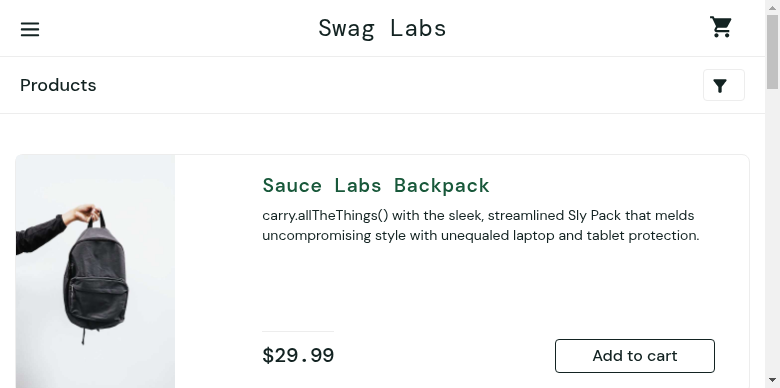

In [24]:
from IPython.display import display
from PIL import Image

image = Image.open("saucedemo_login_result.png")
display(image)


# 🛠️ Selenium Web Automation: SauceDemo End-to-End Test  
This script automates a **full e-commerce purchase flow** using **Selenium WebDriver**.  
It:  
- **Logs into SauceDemo** with test credentials  
- **Adds a product to the cart**  
- **Navigates to the cart and verifies the product**  
- **Proceeds to checkout and enters user details**  
- **Completes the purchase and captures an order confirmation**  
- **Takes a final screenshot for validation**  
- **Closes the browser after execution**  


In [25]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# Configure Chrome options
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run in headless mode
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

# Start WebDriver
driver = webdriver.Chrome(options=options)

# Open SauceDemo login page
driver.get("https://www.saucedemo.com/")
time.sleep(3)

try:
    # ✅ Step 1: Login
    username_field = driver.find_element(By.ID, "user-name")
    password_field = driver.find_element(By.ID, "password")
    login_button = driver.find_element(By.ID, "login-button")

    username_field.send_keys("standard_user")
    password_field.send_keys("secret_sauce")
    login_button.click()

    # Wait until products page loads
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "inventory_list")))

    print("✅ Login successful!")

    # ✅ Step 2: Add product to cart
    add_to_cart_button = driver.find_element(By.XPATH, "//button[text()='Add to cart']")
    add_to_cart_button.click()
    print("🛒 Product added to cart!")

    # ✅ Step 3: Go to cart page
    cart_icon = driver.find_element(By.CLASS_NAME, "shopping_cart_link")
    cart_icon.click()
    time.sleep(3)

    # Verify product in cart
    cart_item = driver.find_element(By.CLASS_NAME, "inventory_item_name")
    if "Sauce Labs Backpack" in cart_item.text:
        print("✅ Product verified in cart!")
    else:
        print("❌ Product missing in cart!")

    # ✅ Step 4: Proceed to checkout
    checkout_button = driver.find_element(By.ID, "checkout")
    checkout_button.click()
    time.sleep(3)

    # ✅ Step 5: Enter checkout details
    first_name = driver.find_element(By.ID, "first-name")
    last_name = driver.find_element(By.ID, "last-name")
    postal_code = driver.find_element(By.ID, "postal-code")

    first_name.send_keys("John")
    last_name.send_keys("Doe")
    postal_code.send_keys("12345")

    continue_button = driver.find_element(By.ID, "continue")
    continue_button.click()
    time.sleep(3)

    # ✅ Step 6: Verify order summary and complete purchase
    finish_button = driver.find_element(By.ID, "finish")
    finish_button.click()

    # Capture order confirmation message
    confirmation_message = driver.find_element(By.CLASS_NAME, "complete-header").text
    print(f"✅ Order Confirmation: {confirmation_message}")

    # ✅ Take final screenshot
    driver.save_screenshot("saucedemo_order_complete.png")
    print("📸 Screenshot saved: saucedemo_order_complete.png")

except Exception as e:
    print("❌ Error:", e)

# Close the browser
driver.quit()


✅ Login successful!
🛒 Product added to cart!
✅ Product verified in cart!
✅ Order Confirmation: Thank you for your order!
📸 Screenshot saved: saucedemo_order_complete.png


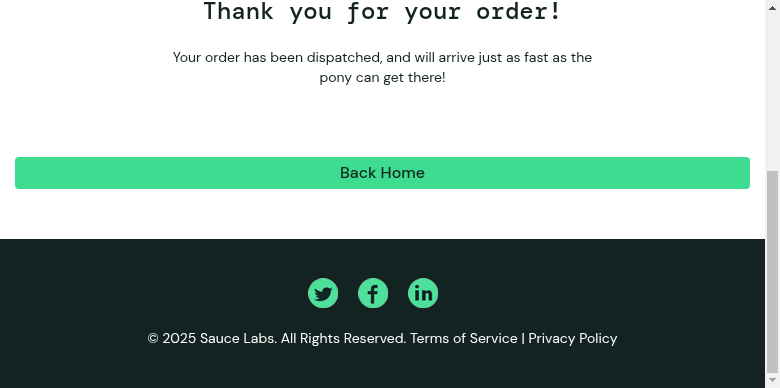

In [26]:
from IPython.display import display
from PIL import Image

image = Image.open("saucedemo_order_complete.png")
display(image)

In [28]:
!pip install selenium pytest pytest-html


# 🛠️ Selenium Web Automation: SauceDemo Pytest Framework  
This script automates a **full e-commerce test suite** using **Selenium WebDriver and Pytest**.  
It includes:
- **`test_login`**: Verifies login functionality  
- **`test_add_to_cart`**: Checks if a product can be added to the cart  
- **`test_checkout`**: Automates the checkout process and order confirmation  
- Uses **Pytest fixtures** for efficient browser management  
- Takes **screenshots for verification**  
- Generates an **automated test report**  


In [40]:
with open("test_saucedemo.py", "w") as f:
    f.write("""import pytest
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

@pytest.fixture
def setup_driver():
    \"\"\" Initializes and yields the WebDriver instance for the test \"\"\"
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")  # Run in headless mode (No UI)
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")

    driver = webdriver.Chrome(options=options)
    yield driver
    driver.quit()

def test_login(setup_driver):
    \"\"\" Test Case 1: Verify Login Functionality \"\"\"
    driver = setup_driver
    driver.get("https://www.saucedemo.com/")
    time.sleep(2)

    driver.find_element(By.ID, "user-name").send_keys("standard_user")
    driver.find_element(By.ID, "password").send_keys("secret_sauce")
    driver.find_element(By.ID, "login-button").click()

    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "inventory_list")))

    assert "inventory.html" in driver.current_url, "❌ Login failed!"
    driver.save_screenshot("login_success.png")
    print("✅ Login successful!")

def test_add_to_cart(setup_driver):
    \"\"\" Test Case 2: Verify Add to Cart Functionality \"\"\"
    driver = setup_driver
    driver.get("https://www.saucedemo.com/")
    time.sleep(2)

    # Perform login
    driver.find_element(By.ID, "user-name").send_keys("standard_user")
    driver.find_element(By.ID, "password").send_keys("secret_sauce")
    driver.find_element(By.ID, "login-button").click()

    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "inventory_list")))

    # Add product to cart
    driver.find_element(By.XPATH, "//button[text()='Add to cart']").click()
    driver.find_element(By.CLASS_NAME, "shopping_cart_link").click()

    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "cart_list")))

    cart_item = driver.find_element(By.CLASS_NAME, "inventory_item_name").text
    assert "Sauce Labs Backpack" in cart_item, "❌ Item not added to cart!"
    driver.save_screenshot("cart_success.png")
    print("✅ Item added to cart!")

def test_checkout(setup_driver):
    \"\"\" Test Case 3: Verify Checkout Process \"\"\"
    driver = setup_driver
    driver.get("https://www.saucedemo.com/")
    time.sleep(2)

    # Perform login
    driver.find_element(By.ID, "user-name").send_keys("standard_user")
    driver.find_element(By.ID, "password").send_keys("secret_sauce")
    driver.find_element(By.ID, "login-button").click()

    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "inventory_list")))

    # Add product and proceed to cart
    driver.find_element(By.XPATH, "//button[text()='Add to cart']").click()
    driver.find_element(By.CLASS_NAME, "shopping_cart_link").click()
    driver.find_element(By.ID, "checkout").click()

    # Enter checkout details
    driver.find_element(By.ID, "first-name").send_keys("John")
    driver.find_element(By.ID, "last-name").send_keys("Doe")
    driver.find_element(By.ID, "postal-code").send_keys("12345")
    driver.find_element(By.ID, "continue").click()

    # Finish purchase
    driver.find_element(By.ID, "finish").click()

    order_confirmation = driver.find_element(By.CLASS_NAME, "complete-header").text
    assert "Thank you for your order!" in order_confirmation, "❌ Checkout failed!"
    driver.save_screenshot("checkout_success.png")
    print("✅ Checkout successful!")

# Run tests if executed directly
if __name__ == "__main__":
    import sys
    sys.exit(pytest.main(["--maxfail=1", "--disable-warnings", "--capture=sys"]))
""")


In [35]:
!ls -lh



total 132K
-rw-r--r-- 1 root root  55K Jan 21 19:28 google_search_result.png
drwxr-xr-x 1 root root 4.0K Jan 17 14:26 sample_data
-rw-r--r-- 1 root root  43K Jan 21 19:36 saucedemo_login_result.png
-rw-r--r-- 1 root root  24K Jan 21 19:40 saucedemo_order_complete.png
-rw-r--r-- 1 root root 3.8K Jan 21 19:48 test_saucedemo.py


In [41]:
!python test_saucedemo.py



======================================= test session starts ========================================
platform linux -- Python 3.11.11, pytest-8.3.4, pluggy-1.5.0
rootdir: /content
plugins: html-4.1.1, metadata-3.1.1, typeguard-4.4.1, anyio-3.7.1
collected 3 items                                                                                  

test_saucedemo.py ...                                                                        [100%]

======================================== 3 passed in 13.59s ========================================


In [43]:
!ls -lh


total 232K
-rw-r--r-- 1 root root  26K Jan 21 19:51 cart_success.png
-rw-r--r-- 1 root root  24K Jan 21 19:52 checkout_success.png
-rw-r--r-- 1 root root  55K Jan 21 19:28 google_search_result.png
-rw-r--r-- 1 root root  43K Jan 21 19:51 login_success.png
drwxr-xr-x 2 root root 4.0K Jan 21 19:51 __pycache__
drwxr-xr-x 1 root root 4.0K Jan 17 14:26 sample_data
-rw-r--r-- 1 root root  43K Jan 21 19:36 saucedemo_login_result.png
-rw-r--r-- 1 root root  24K Jan 21 19:40 saucedemo_order_complete.png
-rw-r--r-- 1 root root 3.8K Jan 21 19:51 test_saucedemo.py


In [44]:
!pytest test_saucedemo.py --html=report.html --self-contained-html


======================================= test session starts ========================================
platform linux -- Python 3.11.11, pytest-8.3.4, pluggy-1.5.0
rootdir: /content
plugins: html-4.1.1, metadata-3.1.1, typeguard-4.4.1, anyio-3.7.1
collected 3 items                                                                                  

test_saucedemo.py ...                                                                        [100%]

------------------------ Generated html report: file:///content/report.html ------------------------
======================================== 3 passed in 16.17s ========================================


In [46]:
from google.colab import files
files.download("report.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>